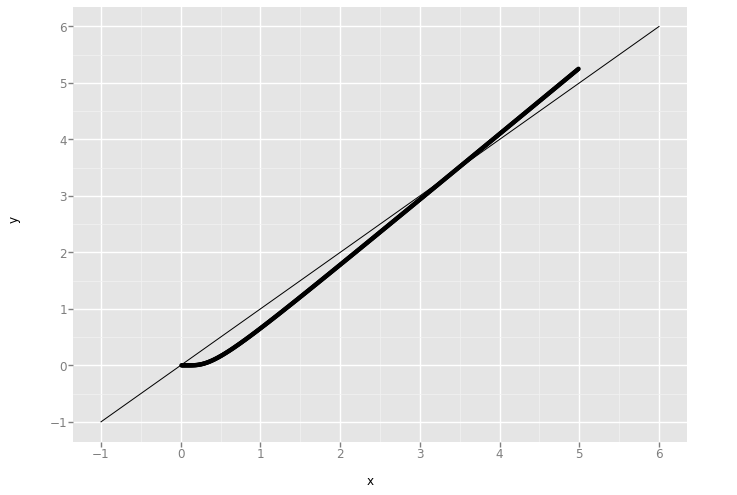

<ggplot: (8782714051557)>


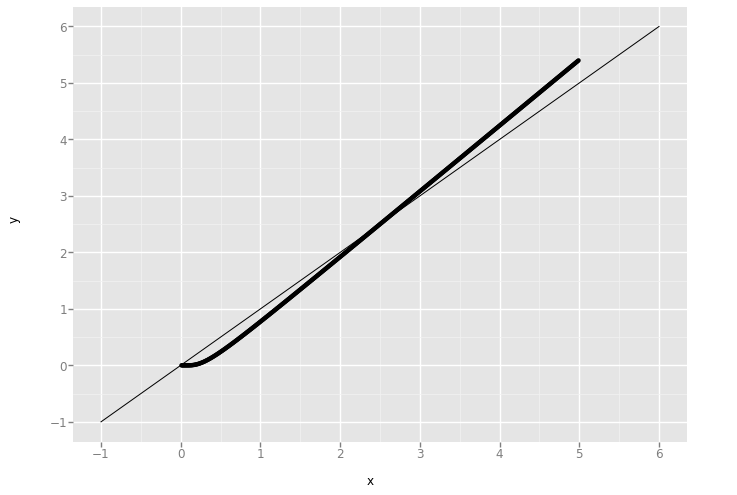

<ggplot: (8782702505537)>


In [6]:
import scipy as sp
from scipy import special
import numpy as np
import pandas as pd
from ggplot import *

# Get gamma parameters from gamma moments for testing

shape = 3.4
rate = 2.5

e = shape / rate
e_log = sp.special.digamma(shape) - np.log(rate)

# rate = shape / e
# e_log = sp.special.digamma(shape) - np.log(shape / e)
#       = sp.special.digamma(shape) - np.log(shape) + np.log(e) =>
# e_log - np.log(e) = sp.special.digamma(shape) - np.log(shape)
# So a fixed point algorithm is
# shape <- np.exp(sp.special.digamma(shape) - e_log + np.log(e))

def gamma_inverse_fp(shape):
    return np.exp(sp.special.digamma(shape) - e_log + np.log(e))

shapes = np.arange(0, 5, 0.01)
f = gamma_inverse_fp(shapes)

# The fixed point is unstable.
plot_df = pd.DataFrame({ 'x': shapes, 'y': f })
print ggplot(plot_df, aes(x='x', y='y')) + geom_point() + geom_abline(slope=1, intercept=0)

# Alternatively
# shape = rate * e
# e_log = sp.special.digamma(rate * e) - np.log(rate)
# So a fixed point algorithm is
# rate <- np.exp(sp.special.digamma(rate * e) - e_log)

def gamma_inverse_fp2(rate):
    return np.exp(sp.special.digamma(rate * e) - e_log)

rates = np.arange(0, 5, 0.01)
f = gamma_inverse_fp2(rates)

# also unstable
plot_df = pd.DataFrame({ 'x': rates, 'y': f })
print ggplot(plot_df, aes(x='x', y='y')) + geom_point() + geom_abline(slope=1, intercept=0)



In [36]:
# Just invert the digamma function maybe
# e_log - np.log(e) + np.log(shape) = sp.special.digamma(shape)

from scipy import optimize

# digamma(a) = da
# a <- a * digamma(a) / da
a = 5
digamma_a = sp.special.digamma(a)

def fp_func(a):
    return a * sp.special.digamma(a) / digamma_a

# This is not super stable.
sp.optimize.fixed_point(fp_func, 10.)        


array(5.000000000000002)

In [44]:
# Try the same idea but with the whole thing
# rate = shape / e
# e_log = sp.special.digamma(shape) - np.log(shape / e)
#       = sp.special.digamma(shape) - np.log(shape) + np.log(e) =>
# e_log - np.log(e) = sp.special.digamma(shape) - np.log(shape)
# Solving for shape gives an unstable fixed point algorithm, but this trick seems to work
# if you start near the correct answer.

def get_gamma_par_from_moments(e, e_log):
    def fp_func(shape):
        return shape * (sp.special.digamma(shape) - np.log(shape)) / (e_log - np.log(e))

    shape_est = sp.optimize.fixed_point(fp_func, 10.)
    rate_est = shape_est / e

    return shape_est, rate_est

shape_est, rate_est = get_gamma_par_from_moments(e, e_log)

print shape_est
print shape

print rate_est
print rate

3.4
3.4
2.5
2.5
